# Test your endpoint

This notebook present some tests to assert the endpoint

In [1]:
# Install requirements
# !pip install -r requirements.txt

  Using cached ultralytics-8.1.5-py3-none-any.whl.metadata (40 kB)
  Using cached numpy-1.26.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached flask-3.0.1-py3-none-any.whl.metadata (3.6 kB)
  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached torch-2.1.2-cp310-cp310-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached torchvision-0.16.2-cp310-cp310

In [ ]:
# Run app

#Run this command on your terminal : python app.py 

In [ ]:
import requests
from cerf_sanglier_detection.yolo_inference import plot_annotated_from_result

In [3]:
# We have put the localhost URL as default, feel free to change it
url = "http://127.0.0.1:5000/predict"

In [4]:
# This a simple example of input for Don MacLean
input_simple = {
    "input": "http://www.pyreneanway.com/blog/wp-content/uploads/2018/11/wild-boar.jpg"
}

In [5]:
res = requests.post(url, json=input_simple)
print(res.status_code)
assert res.status_code == 200

200


In [6]:
res.json()[0]['number_of_detections_by_class']

{'boar': 1, 'deer': 0}

In [7]:
# This a example of input with several inputs
input_multiple = {
    "input": ["wild-boar.jpg",
"https://www.wildlifetrusts.org/sites/default/files/styles/large/public/2017-12/Red%20Deer%20%C2%A9%20Gillian%20Day.JPG?itok=IWpCipcv"]
}

In [8]:
res = requests.post(url, json=input_multiple)
assert res.status_code == 200


In [9]:
results = res.json()
for result in results:
    print(result['number_of_detections_by_class'])

{'boar': 1, 'deer': 0}
{'boar': 0, 'deer': 2}


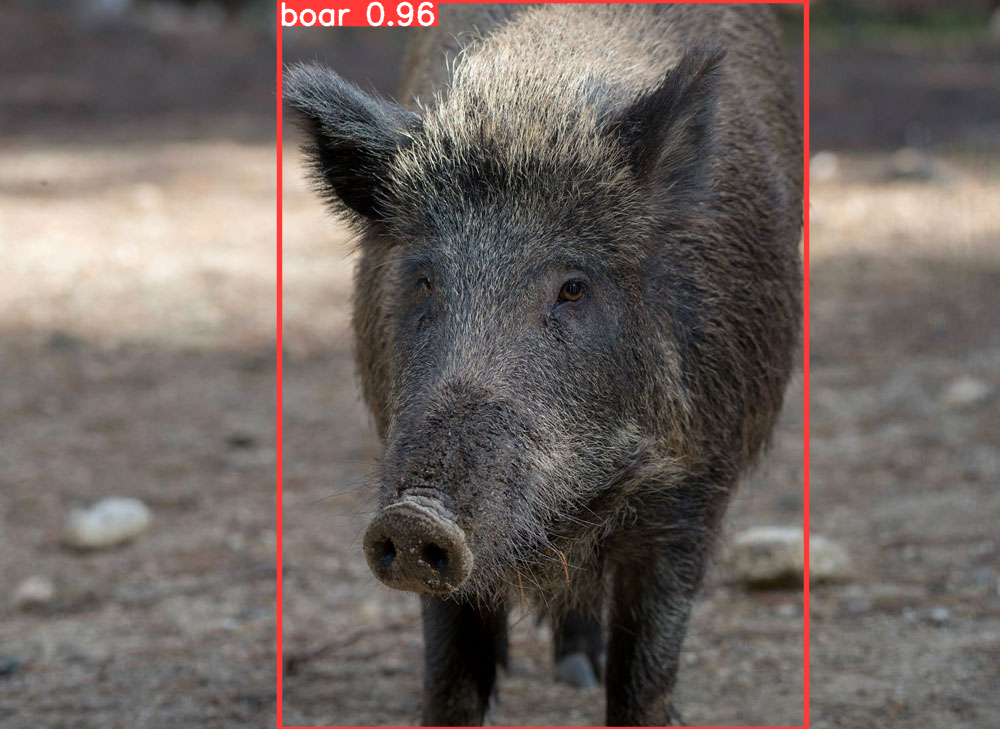

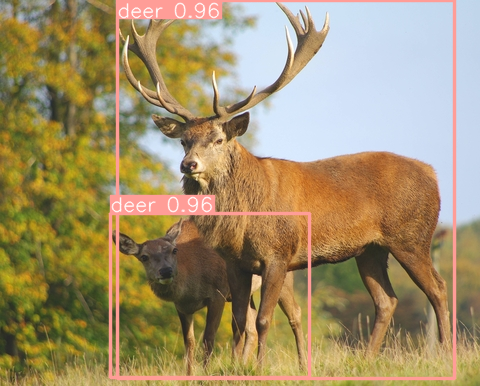

In [10]:
plot_annotated_from_result(results)